In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 86 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


## 3.2 사이킷런 첫 걸음


세 번째 열은 꽃잎의 길이이고 네 번째 열은 꽃잎의 너비입니다. 클래스는 이미 정수 레이블로 변환되어 있습니다.  
0 = Iris-Setosa, 1 = Iris-Versicolor, 2 = Iris-Virginica 입니다.

In [7]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

print ('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [8]:
# 특성을 표준화
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3 , random_state=1, stratify=y)

In [9]:
# 그래프 + 결정경계 그려주는 사용자지정함수
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [27]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier, test_idx=None, resolution=0.02):

  # 마커와 컬러맵 설정
  markers = ('s','x','o','^','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 결정 경계 그리기
  x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
  x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], 
                  y=X[y == cl, 1],
                  alpha=0.8, 
                  c=colors[idx],
                  marker=markers[idx], 
                  label=cl, 
                  edgecolor='black')

  # 테스트 샘플을 부각
  if test_idx:
      # 모든 샘플
      X_test, y_test = X[test_idx, :], y[test_idx]

      plt.scatter(X_test[:, 0],
                  X_test[:, 1],
                  facecolor='none',
                  edgecolor='black',
                  alpha=1.0,
                  linewidth=1,
                  marker='o',
                  s=100, 
                  label='test set')

## matplotlib import ListedColomap 이 안되서 import 시도

In [11]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 124015 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.6) ...


In [16]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 124020 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 5.6 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31648 sha256=66983ce893b3c7b4a2a4ddef46128967c0121b77fe3b694d1caf31fb5c3d0231
  Stored in directory: /root/.cache/pip/wheels/e2/96/fb/b17d6b9adb7c223428b4c77d9e8bc29f40a51d625389b73461
Successfully built libarchive


In [18]:
import libarchive

In [19]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import pydot


# 3.4 서포트 벡터 머신을 사용한 최대 마진 분류

## 3.4.2 슬랙 변수를 사용하여 비선형 분류 문제 다루기

In [28]:
X_combined_std = np.vstack((X_train_std, X_test))
y_combined = np.hstack((y_train, y_test))

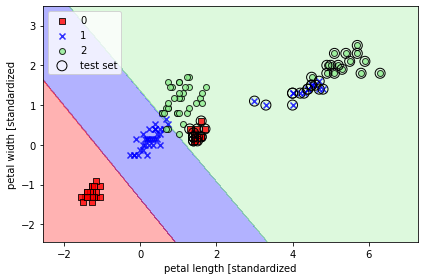

In [29]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 3.5 커널 SVM을 사용하여 비선형 문제 풀기

## 3.5.1 선형적으로 구분되지 않는 데이터를 위한 커널 방법 - XOR문제

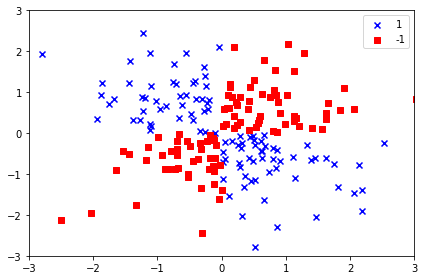

In [30]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor =np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0]> 0,
                       X_xor[:,1] > 0)

y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor==1, 0],
            X_xor[y_xor == 1, 1],
            c='b',marker='x',
            label= '1')
plt.scatter(X_xor[y_xor==-1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 3.5.2 커널 기법을 사용해 고차원 공간에서 분할 초평면 찾기 - XOR문제

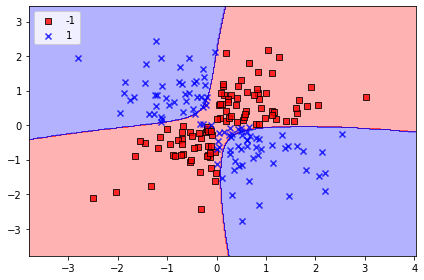

In [31]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

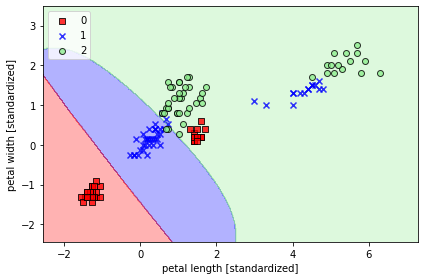

In [34]:
# 감마값 조절해보기
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 105))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
     

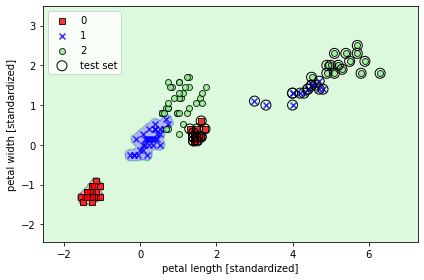

In [33]:
svm = SVC(kernel = 'rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
     